Following this tutorial link with explaination : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Why ?

Tranform.Normalize( (mean_of_R_channel, mean_of_G_channel, mean_of_B_channel) , (std_of_R_channel, std_of_G_channel, std_of_B_channel) )

Here we put 0.5 as meana and std as the data is in the range [0,1] so it will transform the dataset to [-1,1] 
as the minimmum value of 0 will become $\dfrac{0-0.5}{0.5} = -1$ and the maximum value of 1 will come $\dfrac{1-0.5}{0.5} = 1$

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

In [5]:
# Download Data from torchvision dataloader

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=4, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, shuffle=True, batch_size=4, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [19]:
# function to display any image:
def imgshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

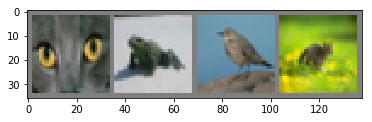

       cat       frog       bird        cat
torch.Size([4, 3, 32, 32])


In [30]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
imgshow(torchvision.utils.make_grid(images))
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))
print(images.shape)

In [77]:
# Defining the convolutional neural net
class Net(nn.Module):
    def __init__(self): 
        super(Net, self).__init__() # Dimensions : 32x32
        self.conv1 = nn.Conv2d(3, 6, 5)  # --> 28 x 28
        self.pool = nn.MaxPool2d(2,2)    # --> 14x14
        self.conv2 = nn.Conv2d(6, 16, 5) # --> 10x10
        # we will add another maxpool but we can use the same self.pool we will define in forward So dimention --> 5x5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [78]:
net = Net()

Defining a Optimizer ! tutorial uses SGD with momentum

In [79]:
loss_criteria = nn.CrossEntropyLoss()
# We tell optimizer to optimize the parameters of neural network net with some learning rate and we are using SGD with momentum
# which converges faster than SGD
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [80]:
# Training the data
epochs = 2
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward propogation
        outputs = net(inputs)
        
        # Calculate the Loss
        loss = loss_criteria(outputs, labels)
        
        # Compute Gradient
        loss.backward()
        
        # Optimize
        optimizer.step()
        
        
        running_loss += loss.item()
        
        if i% 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        

print('Finished Training')


[1,     1] loss: 0.001
[1,  2001] loss: 2.245
[1,  4001] loss: 1.861
[1,  6001] loss: 1.669
[1,  8001] loss: 1.571
[1, 10001] loss: 1.524
[1, 12001] loss: 1.452
[2,     1] loss: 0.002
[2,  2001] loss: 1.395
[2,  4001] loss: 1.347
[2,  6001] loss: 1.360
[2,  8001] loss: 1.303
[2, 10001] loss: 1.306
[2, 12001] loss: 1.307
Finished Training


In [112]:
# Check Accuracy

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, label = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
        
print("Accuracy : {}".format(correct/total*100.0) )
    
    

Accuracy : 53.68000000000001
